# Imports

In [1]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
from ffnn_agent import FFNNAgent

# Demonstration

## Parameters

In [2]:
# Define parameters for the agents

# Environment parameters (example: CartPole)
INPUT_SIZE = 4  # number of input features
OUTPUT_SIZE = 1  # number of output values
HIDDEN_SIZES = [64, 64]  # sizes of hidden layers
LEARNING_RATE = 1e-3  # learning rate
BATCH_SIZE = 32  # mini-batch size for training
EPOCHS = 100  # number of training epochs
TASK_TYPE = "regression" # "regression" or "classification"

# ================================
# FFNN Agent Parameters
# ================================
FFNN_PARAMS = {
    'input_size': INPUT_SIZE,
    'hidden_sizes': HIDDEN_SIZES,
    'output_size': OUTPUT_SIZE,
    'learning_rate': LEARNING_RATE,
    'batch_size': BATCH_SIZE,
    'epochs': EPOCHS,
    'type': TASK_TYPE # Note regression uses MSE loss, classification uses CrossEntropy loss
}

## Initialization

In [3]:
ffnn_agent = FFNNAgent(**FFNN_PARAMS)

Using device: cuda


## Loading dataset

In [4]:
# Load a synthetic dataset for regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X, y = make_regression(
    n_samples=1000,
    n_features=INPUT_SIZE,
    n_informative=3,
    noise=0.1,
    random_state=42
)

# Reshape y to match the expected output shape
y = y.reshape(-1, OUTPUT_SIZE)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Dataset created with {X_train.shape[0]} training samples and {X_test.shape[0]} test samples")
print(f"Input shape: {X_train.shape}, Output shape: {y_train.shape}")


Dataset created with 800 training samples and 200 test samples
Input shape: (800, 4), Output shape: (800, 1)


## Training

Training FFNN Agent:
Epoch [10/100], Loss: 535.7675
Epoch [20/100], Loss: 50.9928
Epoch [30/100], Loss: 32.3008
Epoch [40/100], Loss: 19.4506
Epoch [50/100], Loss: 10.3344
Epoch [60/100], Loss: 5.6975
Epoch [70/100], Loss: 3.4662
Epoch [80/100], Loss: 2.5184
Epoch [90/100], Loss: 2.0109
Epoch [100/100], Loss: 1.6459


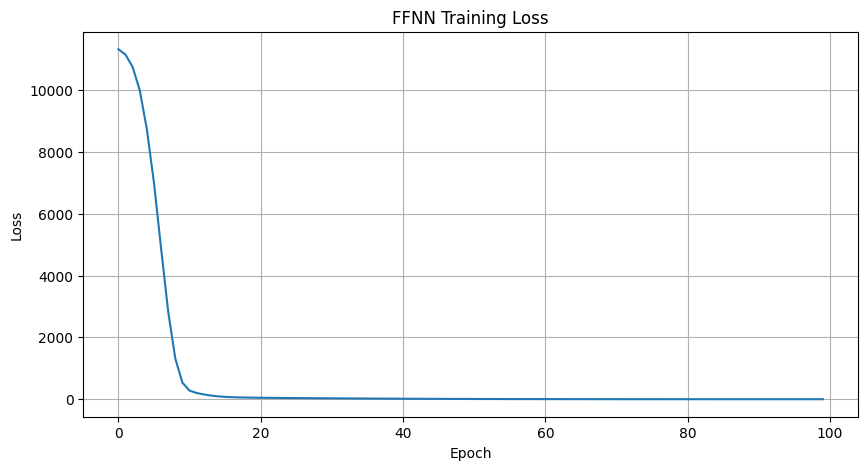

In [5]:
print("Training FFNN Agent:")
losses = ffnn_agent.train(X_train, y_train)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('FFNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Evaluation

Evaluating FFNN Agent...
Mean Squared Error: 2.3340
R-squared: 0.9998


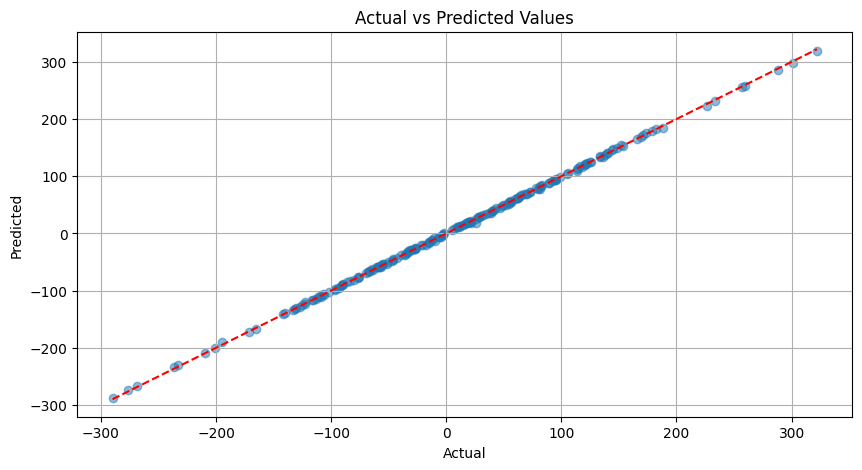

In [6]:
print("Evaluating FFNN Agent...")
# Make predictions on the test set
y_pred = ffnn_agent.predict(X_test)

if TASK_TYPE == "regression":
    # Calculate MSE
    mse = np.mean((y_pred - y_test) ** 2)
    print(f"Mean Squared Error: {mse:.4f}")

elif TASK_TYPE == "classification":
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy: {accuracy:.4f}")

# Calculate R-squared
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

## Save models

In [7]:
ffnn_agent.save("../saved_models/ffnn_agent.pth")

Model saved to ../saved_models/ffnn_agent.pth
